In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 一、数组的创建

##  1. 创建二维数组

In [2]:
np.array([
    [1,2,3],
    [4,6,8],
])

array([[1, 2, 3],
       [4, 6, 8]])

#### *数组宽度需要一致

In [30]:
np.array([
    [1,2,3],
    [4,6,8,7],
])

array([list([1, 2, 3]), list([4, 6, 8, 7])], dtype=object)

## 2. 和python类似的range()函数

In [26]:
np.arange(2, 6, 0.5)

array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

## 3. 创建元素全部为 1/0/随意/指定 的数组（ones、zeros、empty、full）

In [25]:
np.ones(shape=(5,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [28]:
np.ones_like(np.array([[1,2],[7,8]]))

array([[1, 1],
       [1, 1]])

#### 创建不初始化的数组

In [32]:
np.empty(shape=(3,2,2))

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

####  创建数组，指定形状和填充值

In [38]:
np.full((3,4), 5)

array([[5, 5, 5, 5],
       [5, 5, 5, 5],
       [5, 5, 5, 5]])

#### 单位矩阵

In [35]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

#### 等差数列

In [37]:
np.linspace(0, 20, num=11, endpoint=True)

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

#### 等比数列

In [41]:
np.logspace(1, 10, num=10, base=2)

array([   2.,    4.,    8.,   16.,   32.,   64.,  128.,  256.,  512.,
       1024.])

##### 1. range和linspace都可以产生等差数列；
####  2. arange指定的是步长，linspace和logspace指定的是区间内数值的个数。

# 二、数组和列表

####  array采用紧凑形式存储，即直接存储数据，而不是像列表一样存储地址
![这是图片](array&list.png")

#### 1. 创建数组和列表，进行时间和空间衡量

# 三、 数组运算
### 支持矢量运算（广播运算，内存对齐）

In [43]:
a = np.array([1,2,3])

In [48]:
b = np.array([
    [7,2,6],
    [6,5,4]
])

In [46]:
c = 3

## 广播运算，对于形状不同的数组，进行扩展

In [50]:
a+b+c

array([[11,  7, 12],
       [10, 10, 10]])

In [53]:
d = np.array([[1],[2],[3]])

In [54]:
d+a

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

#### 并不是所有情况都可以广播运算，有的时候，广播也不能够形式相同

In [1]:
np.array([1,2])+a

NameError: name 'np' is not defined

# 四、数据类型

### 1. 指定数据类型 

In [9]:
np.array([1, 2.3, 2], dtype=np.float32)

array([1. , 2.3, 2. ], dtype=float32)

### 2. 更改数据类型

In [12]:
a = np.array([1, 2.3, 2], dtype=np.float32)
a.astype(np.int32)

array([1, 2, 2], dtype=int32)

In [15]:
a.dtype=np.int32
a

array([1065353216, 1075000115, 1073741824], dtype=int32)

In [18]:
a = np.arange(24)
a.reshape((3,8))

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [19]:
np.reshape(a, (3, -1))

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

# 五、 索引和切片

## 5.1 reshape可以实现维数的改变

In [26]:
a = np.arange(12)
b=a.reshape((3,4))
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## 5.2 切片，返回原数组对象的视图，共享底层数据

In [39]:
b[1:, 1:3]

array([[ 5,  6],
       [ 9, 10]])

##### 切片，返回视图，如果改变底层数据，另外一个也会发生影响

In [43]:
c = b[:]
c[0, 0] = 777
b

array([[777,   1,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

##### 如果需要深拷贝，可以使用copy()

In [45]:
c = b.copy()
c[0, 0] = 888
b

array([[777,   1,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

## 5.3 数组索引

#### 传入整形索引列表，返回的是新拷贝对象

In [58]:
index = [5, 8, 2, 7]
a[index]

array([5, 8, 2, 7])

##### 创建一个bool数组，可以根据布尔数组选择元素

In [73]:
age = np.array([15, 135, 56, 15, 65, 123, 156, 96, 61, 166, 41, 20])
a[age>50]

array([1, 2, 4, 5, 6, 7, 8, 9])

#### *布尔数组元素个数必须和目标数组数量一致

In [70]:
age1 = np.array([14, 135, 56, 35, 63, 123, 152, 96, 61, 162, 42, 20])
age1 == age

array([False,  True,  True, False, False,  True, False,  True,  True,
       False, False,  True])

In [71]:
a[age1 == age]

array([ 1,  2,  5,  7,  8, 11])

In [85]:
a[(age1 == age) &  (age>50)]

array([1, 2, 5, 7, 8])

# 六、 数据扁平化

#### ravel是浅拷贝， flatten是深拷贝

In [96]:
a = np.arange(10).reshape(2,5)
b = a.flatten()
b[0] = 777
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [99]:
c = a.ravel()
c[0] = 777
a

array([[777,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9]])

#### reshape会把原数组扁平化后，再进行结构化

In [110]:
a = np.arange(24)
a.reshape((6,4), order='c')

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [111]:
a.reshape((6,4), order='f')

array([[ 0,  6, 12, 18],
       [ 1,  7, 13, 19],
       [ 2,  8, 14, 20],
       [ 3,  9, 15, 21],
       [ 4, 10, 16, 22],
       [ 5, 11, 17, 23]])

# 七、 统计函数
* mean/sum
* max/min
* argmax/argmin
* std/ver
* consum/conprod

In [128]:
a = np.array([
    [1,2,3],
    [8,6,1],
    [0,4,15],
    [8,52,32]
])

In [133]:
a.shape

(4, 3)

### 很重要的一个概念：轴

In [126]:
a.sum(axis=0)

array([17, 64, 51])

In [127]:
a.sum(axis=1)

array([ 6, 15, 19, 92])

#### 当维度扩展到多维时，统计规则：
按照指定轴下标索引的方向统计

In [5]:
x = np.arange(24).reshape(2,3,4)
x.shape

(2, 3, 4)

In [3]:
x.sum(axis=0)

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [4]:
x.mean(axis=1)

array([[ 4.,  5.,  6.,  7.],
       [16., 17., 18., 19.]])

# 八、随机函数

#### 1. 随机数

In [58]:
np.random.rand() // 产生的区间为[0,1)

0.5876140647572566

In [59]:
np.random.rand(2,3,4)

array([[[0.39923779, 0.54564034, 0.29082511, 0.55575218],
        [0.9706234 , 0.46321137, 0.53333865, 0.45499656],
        [0.59093915, 0.71118072, 0.20639271, 0.63456103]],

       [[0.43380432, 0.67861236, 0.90540132, 0.41274326],
        [0.33723336, 0.64989966, 0.54551242, 0.50927546],
        [0.42052748, 0.88828045, 0.63187932, 0.88410905]]])

#### 2. 标准正态分布

In [60]:
np.random.rand(3,3)

array([[0.4789705 , 0.06642018, 0.23518938],
       [0.38329877, 0.43547922, 0.28622591],
       [0.91541056, 0.04645713, 0.52973722]])

#### 3. 指定标准差和均值的正态分布

In [62]:
np.random.normal(size=(2,3), loc=5, scale=5)

array([[ 6.65254795,  4.86225972,  5.30554417],
       [ 7.78982908,  9.07412392, 16.97508793]])

#### 4. 随机整数

In [94]:
np.random.seed(1)
np.random.randint(5, 15, size=(8,8))

array([[10, 13, 14, 10,  5,  5,  6, 12],
       [11, 14,  7,  9, 10,  7,  9,  7],
       [ 9, 12, 12, 14,  6, 12,  5, 11],
       [14, 14, 12, 11, 14,  6,  5,  6],
       [13, 13,  8, 14, 13, 12,  8, 11],
       [10,  6, 14,  8,  9, 13,  6,  9],
       [ 5,  8, 14,  7,  5,  9, 14,  7],
       [12, 12, 14, 13, 11, 14,  8, 12]])

In [95]:
np.random.seed(1) // 设定相同的种子
np.random.randint(5, 15, size=(8,8))

array([[10, 13, 14, 10,  5,  5,  6, 12],
       [11, 14,  7,  9, 10,  7,  9,  7],
       [ 9, 12, 12, 14,  6, 12,  5, 11],
       [14, 14, 12, 11, 14,  6,  5,  6],
       [13, 13,  8, 14, 13, 12,  8, 11],
       [10,  6, 14,  8,  9, 13,  6,  9],
       [ 5,  8, 14,  7,  5,  9, 14,  7],
       [12, 12, 14, 13, 11, 14,  8, 12]])

In [93]:
import random
a = random.randrange(5, 15)
b = random.randint(5, 15)
a,b

(13, 9)

#### 5. 洗牌

In [101]:
a = np.arange(10)
np.random.shuffle(a)
a

array([0, 7, 1, 3, 8, 2, 9, 5, 4, 6])

#### 6. 产生随机小数[a, b)

In [99]:
np.random.uniform(2.1, 5.2)

2.816147808859026

# 九、 连接和拆分

In [111]:
a = np.arange(12).reshape(3,2,2)
b = np.arange(12, 24).reshape(3,2,2)
c = np.concatenate((a,b), axis=2)
c

array([[[ 0,  1, 12, 13],
        [ 2,  3, 14, 15]],

       [[ 4,  5, 16, 17],
        [ 6,  7, 18, 19]],

       [[ 8,  9, 20, 21],
        [10, 11, 22, 23]]])

In [120]:
np.split(c, 2, axis=2)  // 切割数量必须能整除，

[array([[[ 0,  1],
         [ 2,  3]],
 
        [[ 4,  5],
         [ 6,  7]],
 
        [[ 8,  9],
         [10, 11]]]), array([[[12, 13],
         [14, 15]],
 
        [[16, 17],
         [18, 19]],
 
        [[20, 21],
         [22, 23]]])]

In [124]:
np.split(c, [3,], axis=2) // 还可以通过列表指定拆分位置，效果如[0-2][3-最后]  

[array([[[ 0,  1, 12],
         [ 2,  3, 14]],
 
        [[ 4,  5, 16],
         [ 6,  7, 18]],
 
        [[ 8,  9, 20],
         [10, 11, 22]]]), array([[[13],
         [15]],
 
        [[17],
         [19]],
 
        [[21],
         [23]]])]

# 十、其它函数

In [139]:
a = np.arange(24).reshape(6,4)
a.any()

True

In [127]:
a.all()

False

#### 转置(颠倒下标)

In [140]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [141]:
a.T

array([[ 0,  4,  8, 12, 16, 20],
       [ 1,  5,  9, 13, 17, 21],
       [ 2,  6, 10, 14, 18, 22],
       [ 3,  7, 11, 15, 19, 23]])

####  **轴变换**

In [143]:
a = np.arange(24).reshape(2,3,4)
a.transpose(2,0,1) 

array([[[ 0,  4,  8],
        [12, 16, 20]],

       [[ 1,  5,  9],
        [13, 17, 21]],

       [[ 2,  6, 10],
        [14, 18, 22]],

       [[ 3,  7, 11],
        [15, 19, 23]]])

# 十一、 运算

## 1. 乘法

In [152]:
a = np.arange(24).reshape(6,4)
b = np.arange(24).reshape(4,6)
c = 5
d = np.arange(4).T

In [148]:
np.dot(a,c)

array([[  0,   5,  10,  15],
       [ 20,  25,  30,  35],
       [ 40,  45,  50,  55],
       [ 60,  65,  70,  75],
       [ 80,  85,  90,  95],
       [100, 105, 110, 115]])

#### 点积(dot 和 @)

In [151]:
np.dot(a, b)

array([[  84,   90,   96,  102,  108,  114],
       [ 228,  250,  272,  294,  316,  338],
       [ 372,  410,  448,  486,  524,  562],
       [ 516,  570,  624,  678,  732,  786],
       [ 660,  730,  800,  870,  940, 1010],
       [ 804,  890,  976, 1062, 1148, 1234]])

In [153]:
a@d

array([ 14,  38,  62,  86, 110, 134])

In [5]:
a = np.arange(24).reshape(2,3,4)
b = np.arange(24).reshape(2,4,3)
a@b

array([[[  42,   48,   54],
        [ 114,  136,  158],
        [ 186,  224,  262]],

       [[ 906,  960, 1014],
        [1170, 1240, 1310],
        [1434, 1520, 1606]]])

## 注意：a的最后一维和b的倒数第二维长度相同才能点积

In [7]:
(a@b).shape

(2, 3, 3)

# 十二、 排序
 * np.sort()     返回新对象
 * 对象.sort()   就地修改

In [23]:
x = np.array([1,43,5,7,3,43,43])

#### np.sort(对象)返回新对象

In [24]:
y = np.sort(x)
y

array([ 1,  3,  5,  7, 43, 43, 43])

In [25]:
x

array([ 1, 43,  5,  7,  3, 43, 43])

#### 对象运用排序方法，返回原对象

In [26]:
x.sort()
x

array([ 1,  3,  5,  7, 43, 43, 43])

#### unique() 去重 & 排序

In [28]:
np.unique(x)

array([ 1,  3,  5,  7, 43])

#### 三目运算

In [29]:
a = np.array([1,  3,  5,  7, 43])
b = np.array([4,  2,  56,  2, 1])
np.where(a>b, a, b)

array([ 4,  3, 56,  7, 43])

#### i/o操作

In [30]:
a = np.arange(24).reshape(2,3,4)

In [32]:
np.save("./" ,a)

In [34]:
result = np.load("./.npy", )
result

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## 练习，读取图像

In [3]:
a = plt.imread('/home/geoffrey/图片/baidu.png')

In [7]:
a.shape

(258, 540, 4)

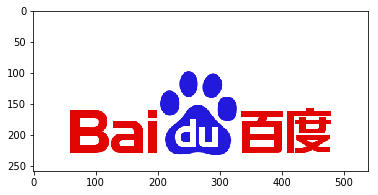

In [8]:
plt.imshow(a)
plt.show()

In [11]:
result = np.split(a, 3)

In [21]:
img_black = np.full((500, 500),fill_value=255,  dtype=np.uint8)

In [22]:
img_black

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [26]:
cv2.imshow('', img_black)
cv2.WaitKey(0)

AttributeError: module 'cv2.cv2' has no attribute 'WaitKey'

In [14]:
plt.imshow(img_black)

# 练习

## 1. 转换为灰度图
灰度图的数据可以看成是二维数组，元素取值为0 ~ 255，其中，0为黑色，255为白色。从0到255逐渐由暗色变为亮色。  
灰度图转换（ITU-R 601-2亮度变换）：  
L = R \* 299 / 1000 + G \* 587 / 1000 + B \* 114 / 1000  
R,G,B为最低维的数据。  
显示灰度图时，需要在imshow中使用参数：  
`cmap="gray"`  

In [308]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [309]:
import numpy as np

def get_color_channels(img):
    img = img.copy()
    channels_num = len(img.shape)
    result = []
    
    channels = np.split(img, channels_num, axis=2)
    for i in channels:
        result.append(i.sum(axis=2)) 
    return result

In [310]:
# img = cv2.imread('/home/geoffrey/图片/小熊猫.png')
img = Image.open('/home/geoffrey/图片/小熊猫.jpeg')
img = np.array(img)

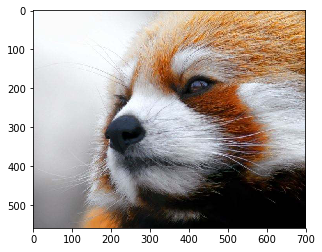

In [311]:
# img.transpose(0,1,2) 
plt.imshow(img)
plt.show()

In [312]:
img.shape

(559, 700, 3)

In [313]:
R, G, B, = get_color_channels(img)

In [314]:
R.shape

(559, 700)

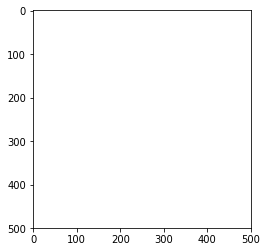

In [315]:
w = np.ones((500,500,3))
plt.imshow(w)
plt.show()

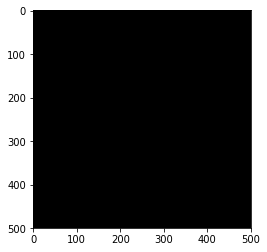

In [316]:
w = np.zeros(shape=(500,500,3), dtype=np.uint8)
plt.imshow(w)
plt.show()

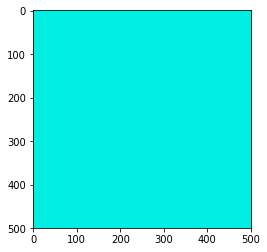

In [317]:
w = np.full(shape=(500,500,3), fill_value=125 , dtype=np.uint8)
w[:] = [0,238,225] # 广播操作
plt.imshow(w)
plt.show()

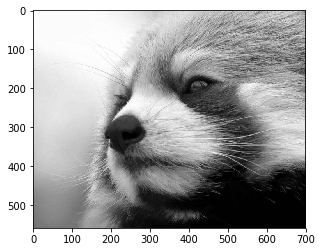

In [318]:
L = R * 299 / 1000 + G * 587 / 1000 + B * 114 / 1000  
plt.imshow(L, cmap="gray")
plt.show()

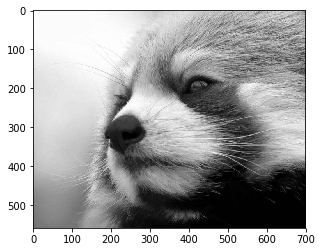

In [319]:
temp = np.array([ 0.299,  0.587, 0.114])
plt.imshow(img@temp, cmap="gray")
plt.show()

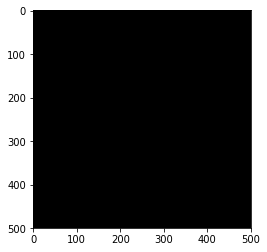

In [320]:
w = np.zeros(shape=(500,500,3), dtype=np.uint8)
plt.imshow(w)
plt.show()

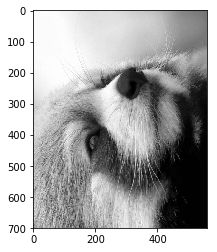

In [321]:
plt.imshow(L.T, cmap="gray")
plt.show()

In [322]:
test1 = np.array([
    [1,0],
    [0,1]
])

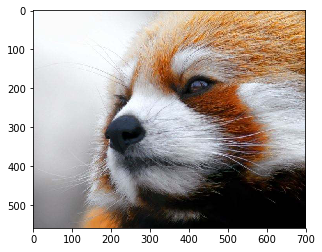

In [323]:
# img.transpose(0,1,2) 
plt.imshow(img)
plt.show()

In [324]:
B_img = img.copy()
B_img[:,:, [0,1]]=0

R_img = img.copy()
R_img[:,:, [0,2]]=0

G_img = img.copy()
G_img[:,:, [2,1]]=0

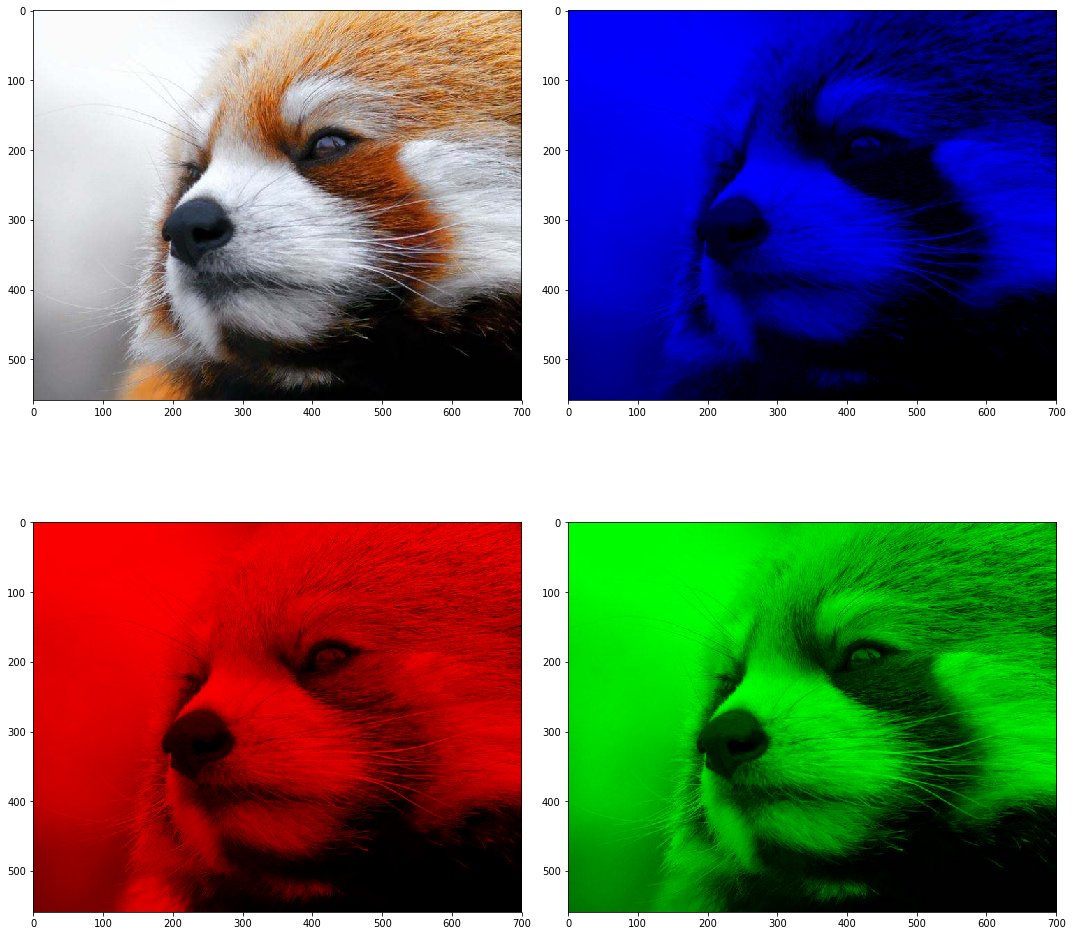

In [325]:
fig,ax = plt.subplots(2,2)
# 
ax[0,0].imshow(img)
ax[1,1].imshow(R_img)
ax[1,0].imshow(G_img)
ax[0,1].imshow(B_img)
fig.set_size_inches(15, 15)
plt.tight_layout()
plt.show()

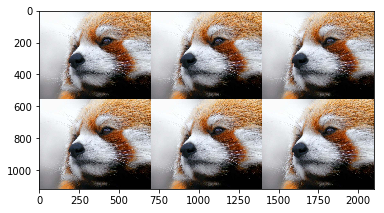

In [326]:
t1 = np.concatenate((img, img, img), axis=1) # 横向拼接
t2 = np.concatenate((t1, t1), axis=0)

plt.imshow(t2)
plt.show()

#### 水平镜像 --- 交换行

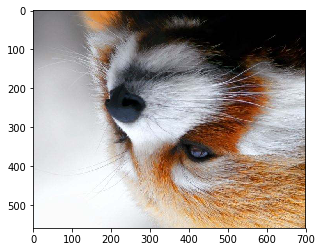

In [327]:
mirrow_img_x = img[::-1]
plt.imshow(mirrow_img_x)
plt.show()

#### 水平翻转 --- 交换列

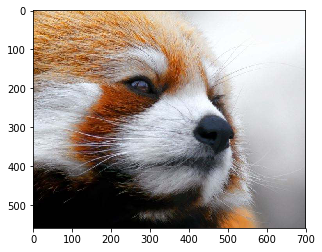

In [328]:
mirrow_img_y = img[:,::-1]
plt.imshow(mirrow_img_y)
plt.show()

#### 调换x,y坐标

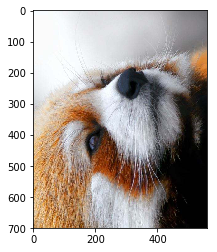

In [329]:
plt.imshow(img.transpose(1,0,2))
plt.show()

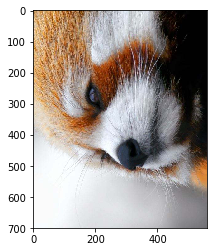

In [330]:
plt.imshow(img.transpose(1,0,2)[::-1])
plt.show()

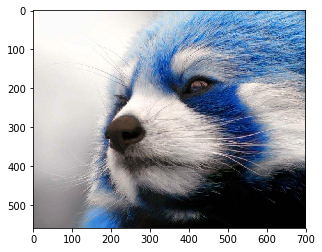

In [331]:
test = img[:, :, [2,1,0]]
plt.imshow(test)
plt.show()

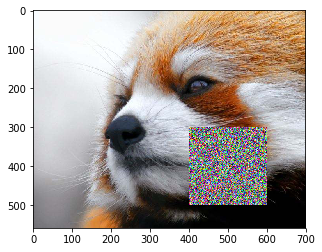

In [336]:
k = np.random.randint(0, 256, size=(200, 200, 3), dtype=np.uint8)
test = img.copy()
test[300:500,400:600] = k
plt.imshow(test)
plt.show()

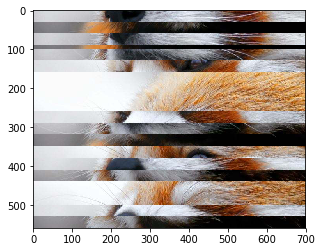

In [333]:
t = img.copy()
height=t.shape[0]

li = np.split(t, range(100, height, 30), axis=0)
np.random.shuffle(li)
t = np.concatenate(li, axis=0)
plt.imshow(t)
plt.show()

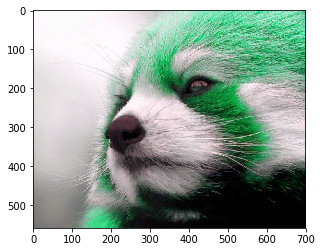

In [335]:
t = img.copy()

plt.imshow(t[:,:,[2,0,1]])
plt.show()